<a href="https://colab.research.google.com/github/Andrew-Haney/DS-Unit-2-Linear-Models/blob/master/Final_4/1/2021_Andrew_Haney_Unit2_Project_Pred_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Import Libraries and Dataset*

In [93]:
import sys
!pip install category_encoders

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score


cols = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'NScore_Neuroticism',
        'EScore_Extraversion', 'OScore_Open_to_Exp', 'AScore_Agreeableness',
        'CScore_Conscientiousness', 'Impulsiveness', 'Sensation_Seeing', 'Alcohol',
        'Amphetamine', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine',
        'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_Highs', 'LSD', 'Meth', 
        'Mushrooms', 'Nicotine', 'Semeron', 'VSA']
df = pd.read_csv('/content/drug_consumption.data',
                 header = 0, names= cols, index_col = 'ID',
                 dtype= 'object')

df = df.copy()

### *Wrangle and Clean Data*

In [94]:
def wrangle(df):
  cutoff = 500
  hcc_cols = [col for col in df.select_dtypes('object').columns
              if df[col].nunique() > cutoff]
  df.drop(columns=hcc_cols, inplace=True)
  single_cols = [col for col in df.select_dtypes('object').columns
              if df[col].nunique() == 1]
  df.drop(columns= single_cols, inplace= True)
  return df

  df = wrangle(df)

In [ ]:
df.info()

In [96]:
df.head()

,Age,Gender,Education,Country,Ethnicity,NScore_Neuroticism,EScore_Extraversion,OScore_Open_to_Exp,AScore_Agreeableness,CScore_Conscientiousness,Impulsiveness,Sensation_Seeing,Alcohol,Amphetamine,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal_Highs,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [98]:
df['Age'] = df['Age'].str.replace('-0.95197', '18-24').str.replace('-0.07854', '25-34').str.replace('0.49788', '35-44').str.replace('1.09449', '45-54').str.replace('1.82213', '55-64').str.replace('2.59171', '65+')
df['Gender'] = df['Gender'].str.replace('-0.48246', 'Female').str.replace('0.48246', 'Male')
df['Cannabis'] = df['Cannabis'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Education'] = df['Education'].str.replace('-2.43591', 'Left_before_16').str.replace('-1.73790', 'Left_at_16').str.replace('-1.43719', 'Left_at_17').str.replace('-1.22751', 'Left_at_18').str.replace('-0.61113', 'Some_College').str.replace('-0.05921', 'Professional_Cert').str.replace('0.45468', 'Univ_degree').str.replace('1.16365', 'Masters_Degree').str.replace('1.98437', 'Dr_Degree')
df['Ethnicity'] = df['Ethnicity'].str.replace('-0.50212', 'Asian').str.replace('-1.10702', 'Black').str.replace('1.90725', 'Bl_As').str.replace('0.12600', 'Wh_As').str.replace('-0.22166', 'Wh_Bl').str.replace('0.11440', 'Other').str.replace('-0.31685', 'White')
df['Country'] = df['Country'].str.replace('-0.09765', 'Australia').str.replace('0.24923', 'Canada').str.replace('-0.46841', 'New_Zealand').str.replace('-0.28519', 'Other').str.replace('0.21128', 'Ireland').str.replace('0.96082', 'UK').str.replace('-0.57009', 'USA')
df['Alcohol'] = df['Alcohol'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Amphetamine'] = df['Amphetamine'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Amyl'] = df['Amyl'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Benzos'] = df['Benzos'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Caffeine'] = df['Caffeine'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Chocolate'] = df['Chocolate'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Cocaine'] = df['Cocaine'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Crack'] = df['Crack'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Ecstasy'] = df['Ecstasy'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Heroin'] = df['Heroin'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Ketamine'] = df['Ketamine'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Legal_Highs'] = df['Legal_Highs'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['LSD'] = df['LSD'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Meth'] = df['Meth'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Mushrooms'] = df['Mushrooms'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Nicotine'] = df['Nicotine'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['Semeron'] = df['Semeron'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')
df['VSA'] = df['VSA'].str.replace('CL6', 'Used_24hrs').str.replace('CL5', 'Used_7days').str.replace('CL4', 'Used_Month').str.replace('CL3', 'Used_Year').str.replace('CL2', 'Used_Decade').str.replace('CL1', 'Used_Life').str.replace('CL0', 'Never_Used')

In [99]:
df['NScore_Neuroticism'] = df['NScore_Neuroticism'].astype(float)
df['EScore_Extraversion'] = df['EScore_Extraversion'].astype(float)
df['OScore_Open_to_Exp'] = df['OScore_Open_to_Exp'].astype(float)
df['AScore_Agreeableness'] = df['AScore_Agreeableness'].astype(float)
df['CScore_Conscientiousness'] = df['CScore_Conscientiousness'].astype(float)
df['Impulsiveness'] = df['Impulsiveness'].astype(float)
df['Sensation_Seeing'] = df['Sensation_Seeing'].astype(float)

### *Explore Data*

In [ ]:
df['Age'].value_counts(normalize= True)

In [ ]:
df['OScore_Open_to_Exp'].value_counts()

In [102]:
df.head()

,Age,Gender,Education,Country,Ethnicity,NScore_Neuroticism,EScore_Extraversion,OScore_Open_to_Exp,AScore_Agreeableness,CScore_Conscientiousness,Impulsiveness,Sensation_Seeing,Alcohol,Amphetamine,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal_Highs,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,25-34,Female,Dr_Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,Used_7days,Used_Decade,Used_Decade,Never_Used,Used_24hrs,Used_Month,Used_24hrs,Used_Year,Never_Used,Used_Month,Never_Used,Used_Decade,Never_Used,Used_Decade,Used_Year,Never_Used,Used_Month,Never_Used,Never_Used
3,35-44,Female,Professional_Cert,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,Used_24hrs,Never_Used,Never_Used,Never_Used,Used_24hrs,Used_Year,Used_Month,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Used_Life,Never_Used,Never_Used,Never_Used
4,18-24,Male,Masters_Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,Used_Month,Never_Used,Never_Used,Used_Year,Used_7days,Used_Decade,Used_Month,Used_Decade,Never_Used,Never_Used,Never_Used,Used_Decade,Never_Used,Never_Used,Never_Used,Never_Used,Used_Decade,Never_Used,Never_Used
5,35-44,Male,Dr_Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,Used_Month,Used_Life,Used_Life,Never_Used,Used_24hrs,Used_Year,Used_24hrs,Never_Used,Never_Used,Used_Life,Never_Used,Never_Used,Used_Life,Never_Used,Never_Used,Used_Decade,Used_Decade,Never_Used,Never_Used
6,65+,Male,Left_at_18,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,Used_Decade,Never_Used,Never_Used,Never_Used,Used_24hrs,Never_Used,Used_Month,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Never_Used,Used_24hrs,Never_Used,Never_Used


### *Choose target and split data*

In [104]:
target = 'Meth'
X = df.drop(columns= target)
y = df[target]

In [105]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state= 42)


In [106]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1507, 30)
(1507,)
(377, 30)
(377,)


### *Build Models*

In [108]:
model_rf = make_pipeline(OrdinalEncoder(),
                         SimpleImputer(),
                         RandomForestClassifier(max_depth= 10, n_jobs= -1))

model_rf.fit(X_train, y_train)
print('Validation Score: ', model_rf.score(X_val, y_val))

Validation Score:  0.7771883289124668


In [109]:
print('Baseline accuracy ', y_train.value_counts(normalize= True).max())

Baseline accuracy  0.7551426675514267


In [ ]:
df_numerical = df.select_dtypes(exclude= 'object')
df_numerical.head()

In [113]:
from xgboost import XGBClassifier

model_boost = make_pipeline(OrdinalEncoder(),
                            SimpleImputer(strategy= 'median'),
                            XGBClassifier(n_estimators= 75, learning_rate= 0.2,
                                          random_state= 42))
model_boost.fit(X_train, y_train);

In [117]:
target= 'Amphetamine'
X2 = df_cat.drop(columns= target)
y2 = df_cat[target]

X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size= 0.3, 
                                                      random_state= 42)

In [154]:
model_boost_cat = make_pipeline(OrdinalEncoder(),
                            SimpleImputer(strategy= 'median'),
                            XGBClassifier(n_estimators= 50, learning_rate= 0.1,
                                          random_state= 42, n_jobs= -1))
model_boost_cat.fit(X2_train, y2_train);

### *Check Metrics and Visualize Data*

In [142]:
print('Training Accuracy: ', model_boost.score(X_train, y_train))
print('Validation Accuracy: ', model_boost.score(X_val, y_val))

Training Accuracy:  0.9256801592568016
Validation Accuracy:  0.7798408488063661


In [155]:
baseline_acc2 = y2_train.value_counts(normalize= True).max()
print('Baseline Accuracy 2: ', baseline_acc2)
print('Training Accuracy 2: ', model_boost_cat.score(X2_train, y2_train))
print('Validation Accuracy 2: ', model_boost_cat.score(X2_val, y2_val))

Baseline Accuracy 2:  0.5098634294385432
Training Accuracy 2:  0.7496206373292867
Validation Accuracy 2:  0.6431095406360424


In [115]:
df_cat = df.select_dtypes(exclude= 'number')

In [ ]:
df_cat.head()

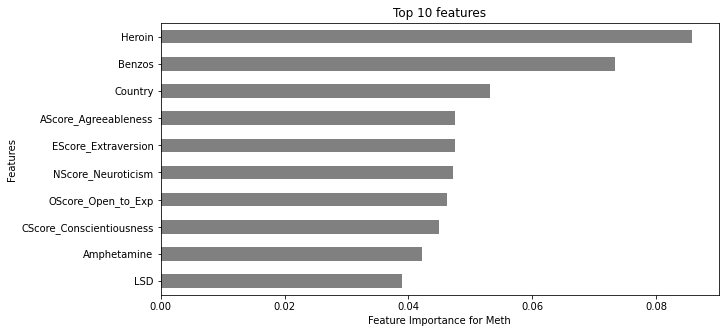

In [112]:
rf = model_rf.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey')
plt.xlabel('Feature Importance for Meth')
plt.ylabel('Features');

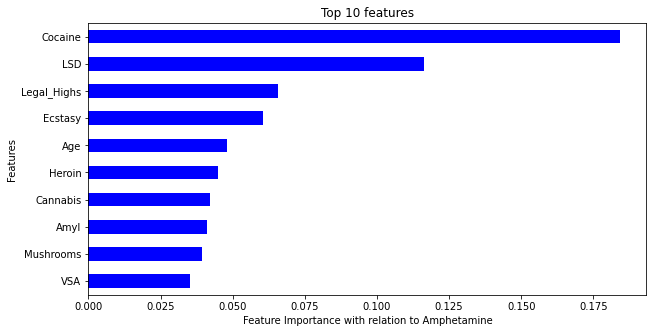

In [148]:
boost_cat = model_boost_cat.named_steps['xgbclassifier']
importances_cat = pd.Series(boost_cat.feature_importances_, X2_val.columns)

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances_cat.sort_values()[-n:].plot.barh(color= 'blue')
plt.xlabel('Feature Importance with relation to Amphetamine')
plt.ylabel('Features');

In [122]:
df_numerical.shape

(1884, 7)

In [160]:
heroin = df_cat['Heroin']
cannabis = df_cat['Cannabis']
meth = df_cat['Meth']
alcohol = df_cat['Alcohol']
ketamine = df_cat['Ketamine']
acid = df_cat['LSD']
mushrooms = df_cat['Mushrooms']
nicotine = df_cat['Nicotine']
caffeine = df_cat['Caffeine']
chocolate = df_cat['Chocolate']

age_group = df_cat['Age']
O_score = df_numerical['OScore_Open_to_Exp']
C_score = df_numerical['CScore_Conscientiousness']
E_score = df_numerical['EScore_Extraversion']
A_score = df_numerical['AScore_Agreeableness']
N_score = df_numerical['NScore_Neuroticism']
impulsiveness = df_numerical['Impulsiveness']
sen_seeing = df_numerical['Sensation_Seeing']
education = df_cat['Education']

illegal_drugs = pd.DataFrame(data= df_cat, columns= ['Heroin', 'Meth', 'Ketamine',
                                                     'LSD', 'Mushrooms'])
legal_drugs = pd.DataFrame(data= df_cat, columns= ['Cannabis', 'Nicotine', 'Caffeine',
                                                   'Alcohol', 'Chocolate'])

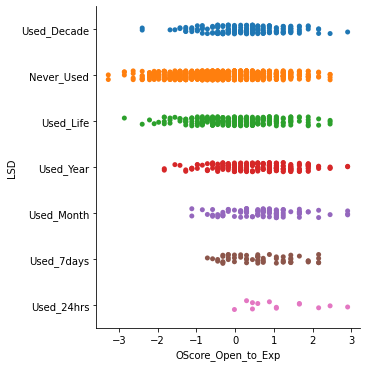

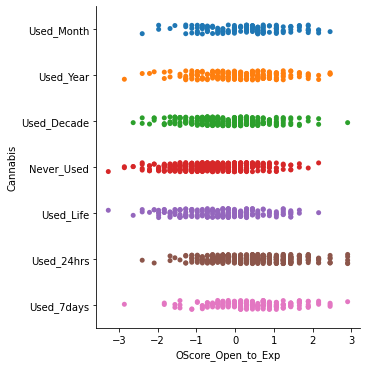

In [165]:
import seaborn as sns

sns.catplot(data= df_cat, x= O_score, y= acid);
sns.catplot(data= df_cat, x= O_score, y= cannabis);

##### **O-Score(Openness)** is a person's willingness to be open to new ideas and experiences.  Scoring is again, very similar to the the E-Score in the sense that a higher positive score indicates you are more likely to experiment with various substances.

##### **C-Score(Conscientiousness)** shows organization vs chaos. At the highest end of the scale, perfectionism and OCD are prevalent.  On the lowest end of the scale would be those who act before thinking and spontaneous individuals. 

##### **E-Score(Extraversion)** in this scenario uses 0 as a start point and a positive score indicating you are more extroverted while a negative score indicates a personality that is more introverted.

##### **A-Score(Agreeableness)** is how agreeable or prone to persuasion an individual is. Someone with a higher score is more likely to be a people pleaser, while someone with a low score is more likely to be invested in personal interests.

##### **N-Score(Neuroticism)** is scored on a scale of 0-12. A score of 0-6 means there is a general lack of Neuroticism present and 6-12 indicates a positive result for Neuroticism.  In this case, we will be using a scale from 0.0 to 1.2 with 0.6 being the cutoff.


In [125]:
clr = classification_report(y2_val, model_boost_cat.predict(X2_val))

In [126]:
print(clr)

              precision    recall  f1-score   support

  Never_Used       0.82      0.86      0.84       304
  Used_24hrs       0.31      0.18      0.23        28
  Used_7days       0.08      0.04      0.06        23
 Used_Decade       0.35      0.45      0.39        66
   Used_Life       0.64      0.44      0.53        81
  Used_Month       0.00      0.00      0.00        20
   Used_Year       0.21      0.32      0.25        44

    accuracy                           0.61       566
   macro avg       0.34      0.33      0.33       566
weighted avg       0.61      0.61      0.60       566

